<a href="https://colab.research.google.com/github/brendanpshea/data-science/blob/main/DataScience_07_InferentialStats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction: What is Inferential Statistics?

## How can we make sense of the Shire's housing market?

Imagine you're a curious hobbit named Frodo Baggins, and you've just inherited Bag End from your uncle Bilbo. As you settle into your new home, you start wondering about the housing market in the Shire. How much are other hobbit-holes worth? What factors influence their prices? Is Bag End truly as valuable as everyone says?

To answer these questions, you could try to gather information about every single hobbit-hole in the Shire. But that would take years, and by the time you finished, the market would have changed! This is where **inferential statistics** comes to the rescue.

**Inferential statistics** is a powerful tool in data science that allows us to draw conclusions about a large group (called a **population**) based on a smaller, representative subset (called a **sample**). It's like tasting a spoonful of Farmer Maggot's mushroom soup to judge the flavor of the entire pot.

In the context of our Shire housing market example, inferential statistics would help us:

1. **Estimate** the average price of hobbit-holes in the entire Shire based on data from a few neighborhoods.
2. **Predict** how factors like square footage or distance to the nearest pub might affect a hobbit-hole's price.
3. **Test hypotheses** about the housing market, such as whether homes in Hobbiton are significantly more expensive than those in Buckland.

Key concepts in inferential statistics include:

- **Population**: The entire group we're interested in studying (e.g., all hobbit-holes in the Shire).
- **Sample**: A subset of the population that we actually measure or observe.
- **Parameter**: A numerical value that describes a characteristic of the population (e.g., the true average price of all hobbit-holes).
- **Statistic**: A numerical value calculated from the sample data that estimates a population parameter.

Throughout this chapter, we'll explore various inferential statistics techniques using our Shire housing dataset. We'll learn how to:

- Perform **t-tests** to compare means between groups (Are Hobbiton houses really more expensive?)
- Calculate **z-scores** to understand how unusual a particular observation is (Is Bag End exceptionally large?)
- Interpret **p-values** to assess the strength of our statistical evidence
- Use **chi-squared tests** to examine relationships between categorical variables (Is there an association between neighborhood and garden size?)
- Conduct **hypothesis tests** to make decisions based on data
- Explore **correlations** between variables (Does distance to the nearest pub affect house prices?)

By the end of this chapter, you'll have the tools to make data-driven decisions about the Shire's housing market – or any other dataset you encounter on your adventures through Middle-earth and beyond!



## Intro to Shire Housing Dataset: What secrets does our hobbit-hole data hold?

Welcome to the Shire, a land of rolling hills, cozy hobbit-holes, and... data! Our journey through inferential statistics will be guided by a dataset containing information about hobbit-holes across various neighborhoods in the Shire. Let's take a closer look at what we're working with.

Our dataset includes the following variables:

1.  **SquareFootage**: The size of the hobbit-hole in square feet.
2.  **Age**: How many years ago the hobbit-hole was built.
3.  **Neighborhood**: The area of the Shire where the hobbit-hole is located.
4.  **GardenSize**: The size of the garden in square feet.
5.  **DistanceToPub**: How far the hobbit-hole is from the nearest pub, in miles.
6.  **Price**: The price of the hobbit-hole in gold pieces.

Here's a glimpse of our data:

In [ ]:
import pandas as pd
import numpy as np

!wget https://github.com/brendanpshea/data-science/raw/main/data/shire_house_prices.csv -q
shire_df = pd.read_csv('shire_house_prices.csv')
shire_df.head()

## Bilbo's Hobbit-Hole (Descriptive) Statistics Class
Before diving into inferential statistics, let's take a moment to review some of the concepts of **descriptive statistics.** We'll do so with the help of Bilbo Baggins...

In a cozy classroom in Hobbiton, Bilbo Baggins stood before a group of young hobbits, both lads and lasses. Their eyes were wide with curiosity as Bilbo began his lesson on the fascinating world of statistics.

"Now, my dear young hobbits," Bilbo began with a twinkle in his eye, "before we embark on our grand statistical adventure, let's revisit some of the basics. I have here some interesting numbers about hobbit-holes in the Shire. Let's see what tales they can tell us!"

Bilbo unfurled a large parchment with the following information (the output of the Pandas method `df.desribe()`).

In [ ]:
shire_df.describe(include='all').round(1)

,SquareFootage,Age,Neighborhood,GardenSize,DistanceToPub,Price
count,1000.0,1000.0,1000,1000.0,1000.0,1000.0
unique,NaN,NaN,5,NaN,NaN,NaN
top,NaN,NaN,Buckland,NaN,NaN,NaN
freq,NaN,NaN,211,NaN,NaN,NaN
mean,802.2,30.4,NaN,495.6,1.0,3495.4
std,197.1,14.1,NaN,99.7,0.5,779.7
min,245.0,0.0,NaN,159.0,0.0,1447.0
25%,671.0,21.0,NaN,428.8,0.7,2949.2
50%,803.0,30.0,NaN,492.0,1.0,3431.5
75%,936.2,40.0,NaN,560.2,1.3,4003.0


"Now then," Bilbo continued, "who can tell me what we're looking at here?"

A young hobbit lass named Primrose raised her hand. "Mr. Bilbo, sir, it looks like information about hobbit-holes!"

"Excellent, Primrose!" Bilbo beamed. "Indeed it is. We have data on 1000 hobbit-holes in the Shire. Let's explore what these numbers can tell us."

### Sample Size and Variables

"First," Bilbo pointed out, "we can see that we have information on 1000 hobbit-holes. This is our sample size. We're looking at several characteristics, or variables: SquareFootage, Age, Neighborhood, GardenSize, DistanceToPub, and Price."

### Measures of Central Tendency

"Now, who remembers what we call the 'typical' or 'average' value?" Bilbo asked.

A young hobbit lad named Hamfast piped up, "The mean, Mr. Bilbo!"

"Very good, Hamfast!" Bilbo nodded. "The 'mean' row shows us the average for each characteristic. For example, the average hobbit-hole in our sample:

-   Is about 799 square feet
-   Is about 30 years old
-   Has a garden of about 499 square feet
-   Is 1 mile from the nearest pub
-   Costs about 3,495 gold pieces"

"But the mean isn't the only way to find the 'middle' of our data," Bilbo continued. "Who remembers another?"

Primrose's hand shot up again. "The median, Mr. Bilbo!"

"Excellent, Primrose!" Bilbo smiled. "The median is the middle value when we order all the data. It's shown in the '50%' row. For example, the median hobbit-hole price is 3,432 gold pieces. This means half of the hobbit-holes cost more than this, and half cost less."

"And for our neighborhood data," Bilbo added, "we have something called the mode. It's the most common category. Here, Buckland is the most common neighborhood, with 211 hobbit-holes."

### Measures of Spread

"Now," Bilbo continued, his eyes twinkling with excitement, "let's talk about how spread out our data is. This tells us about the variety of hobbit-holes in the Shire."

"Who can tell me how we might describe the spread of data?" Bilbo asked.

A quiet hobbit named Marigold spoke up, "The range, Mr. Bilbo?"

"Wonderful, Marigold!" Bilbo exclaimed. "The range is the difference between the largest and smallest values. For price, the range is 6,743 - 1,447 = 5,296 gold pieces. Quite a difference between the most and least expensive hobbit-holes!"

"Another important measure of spread," Bilbo continued, "is the standard deviation. It tells us how far, on average, values tend to be from the mean. For price, it's about 780 gold pieces."

### Percentiles

"Lastly," Bilbo said, "let's look at the percentiles. The '25%' and '75%' rows show us the first and third quartiles. For price, 25% of hobbit-holes cost less than 2,949 gold pieces, and 75% cost less than 4,003 gold pieces."

### Conclusion

As the young hobbits scribbled notes, Bilbo summarized, "These descriptive statistics give us a quick but informative glimpse into the hobbit-holes of the Shire. They tell us what's typical, what's unusual, and how much variety exists."

"Remember," Bilbo said with a wink, "just as every hobbit-hole tells a story about its inhabitants, every number in these statistics tells us something about our community. In our future lessons, we'll learn how to use this information to make inferences and predictions. But for now, let's practice calculating these statistics ourselves!"

The young hobbits eagerly pulled out their abacuses, ready to dive into the world of descriptive statistics under Bilbo's guidance. As they worked, Bilbo smiled, knowing that these fundamental concepts would serve as the foundation for their future statistical adventures.

## T-tests: Comparing Hobbit-Hole Prices

### Are Hobbiton homes really more expensive than those in Buckland?

Meet Rosie Cotton, a savvy hobbit real estate agent who's curious about the housing market in different parts of the Shire. She's heard rumors that homes in Hobbiton are more expensive than those in Buckland, but she wants to use data to confirm this claim. This is where **t-tests** come in handy!

A **t-test** is a statistical method used to determine if there's a significant difference between the means (averages) of two groups. It's like comparing the average size of apples from two different orchards to see if one orchard produces larger apples.

Key terms and concepts:

- **Null hypothesis (H₀)**: The initial assumption that there's no significant difference between the groups. In Rosie's case, the null hypothesis would be: "There's no significant difference in average price between Hobbiton and Buckland homes."

- **Alternative hypothesis (H₁)**: The claim we're testing against the null hypothesis. For Rosie: "There is a significant difference in average price between Hobbiton and Buckland homes."

- **Sample mean**: The average value calculated from our sample data.

- **Standard deviation**: A measure of how spread out the data points are from the mean.

- **Degrees of freedom (df)**: A numerical value related to the sample size that affects the shape of the t-distribution.

- **T-statistic**: A value calculated from our data that we use to determine if the difference between groups is statistically significant.

- **P-value**: The probability of obtaining results at least as extreme as our observed data, assuming the null hypothesis is true.

- **Significance level (α)**: The threshold we use to decide if our result is statistically significant, typically set at 0.05 (5%).

### Step-by-step example:

1. Rosie collects data on home prices from 30 houses in Hobbiton and 30 in Buckland.

2. She calculates the sample means (these are made up numbers, not reflective of our actual data set)
   - Hobbiton mean price: 3500 gold pieces
   - Buckland mean price: 3200 gold pieces

3. Rosie performs a two-sample t-test (comparing two independent groups).

4. She calculates the t-statistic and p-value using statistical software.

5. Results: t-statistic = 2.1, p-value = 0.04

6. Interpretation: Since the p-value (0.04) is less than the significance level (0.05), Rosie rejects the null hypothesis. She concludes that there is a statistically significant difference in average home prices between Hobbiton and Buckland.

### Performing a t-test in Python:

Here's a concise way to perform a t-test using Python:

```python
import scipy.stats as stats

# Assuming we have two lists: hobbiton_prices and buckland_prices
t_stat, p_value = stats.ttest_ind(hobbiton_prices, buckland_prices)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")
```

### Applying t-tests to the Shire datase

Let's use our Shire housing dataset to compare prices between Hobbiton and Buckland:

In [ ]:
import scipy.stats as stats
# Filter data for Hobbiton and Buckland
hobbiton = shire_df[shire_df["Neighborhood"] == "Hobbiton"]["Price"]
buckland = shire_df[shire_df["Neighborhood"] == "Buckland"]["Price"]

# print sample means
print("Hobbiton mean price:", hobbiton.mean().round(2))
print("Buckland mean price:", buckland.mean().round(2))

# Perform t-test
t_stat, p_value = stats.ttest_ind(hobbiton, buckland)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

Hobbiton mean price: 3408.1
Buckland mean price: 3617.11
T-statistic: -2.68
P-value: 0.0077


This code will perform a t-test on our Shire dataset, comparing home prices in Hobbiton and Buckland. The results will help us determine if there's a statistically significant difference in prices between these two neighborhoods.

This result shows:

- The average house price in Hobbiton is 3408.1 gold pieces.
- The average house price in Buckland is 3617.11 gold pieces.
- The t-statistic of -2.68 indicates a difference between these means.
- The p-value (more on this later) of 0.0077 is less than the common significance level of 0.05.

Interpretation: There is strong statistical evidence (p < 0.05) that house prices in Buckland are significantly higher than in Hobbiton. The difference appears to be about 209 gold pieces on average.


Remember, though, a t-test is just one tool in our statistical toolbox.

It's great for comparing means between two groups, but it has limitations. For example, it assumes our data is normally distributed and doesn't account for other factors that might influence home prices. As we progress through this chapter, we'll explore other statistical methods that can provide deeper insights into our Shire housing market!

## Z-scores: How Unusual is Bag End?

### Is Bilbo's home truly extraordinary among hobbit-holes?

Imagine Lobelia Sackville-Baggins, always curious (and perhaps a bit envious) about her cousin Bilbo's famous home, Bag End. She wonders: just how exceptional is Bag End compared to other hobbit-holes in the Shire? To answer this question objectively, we can use a statistical tool called the **Z-score**.

A **Z-score** (also known as a standard score) tells us how many standard deviations an individual data point is from the mean of a dataset. It's like measuring how far away a hobbit is from the average height - are they unusually tall, short, or right in the middle?

Key terms and concepts:

- **Mean (μ)**: The average value in a dataset, calculated by summing all values and dividing by the number of data points.

- **Standard Deviation (σ)**: A measure of how spread out the data is from the mean. A low standard deviation indicates that most data points are close to the mean, while a high standard deviation suggests the data is more spread out.

- **Normal Distribution**: A symmetric, bell-shaped distribution of data where most values cluster around the mean, with fewer values towards the extremes.

- **Z-score**: A measure of how many standard deviations a data point is from the mean. Calculated as: Z = (X - μ) / σ, where X is the individual value, μ is the mean, and σ is the standard deviation.

- **Percentile**: The percentage of scores in a distribution that fall at or below a particular score.

### Step-by-step example:

1. Lobelia gathers data on the square footage of 100 hobbit-holes in the Shire.

2. She calculates the mean (μ) square footage: 800 sq ft
   And the standard deviation (σ): 150 sq ft

3. Bag End's square footage (X): 1200 sq ft

4. Lobelia calculates the Z-score for Bag End:
   Z = (X - μ) / σ = (1200 - 800) / 150 = 2.67

5. Interpretation:
   - A Z-score of 2.67 means Bag End is 2.67 standard deviations above the mean.
   - In a normal distribution, about 99.6% of the data falls within 3 standard deviations of the mean.
   - Bag End is larger than approximately 99.6% of hobbit-holes in the Shire!

### Calculating Z-scores in Python:

Here's a concise way to calculate Z-scores using Python:

In [ ]:
# Bag End's square footage (assuming it's not in the dataset)
bag_end_size = 1200

# Calculate Z-score
z_score = (bag_end_size - shire_df['SquareFootage'].mean()) / shire_df['SquareFootage'].std()

print(f"Z-score of Bag End: {z_score:.2f}")

# Calculate percentile
percentile = (shire_df['SquareFootage'] < bag_end_size).mean() * 100
print(f"Bag End is larger than {percentile:.1f}% of hobbit-holes in our dataset")

Z-score of Bag End: 2.02
Bag End is larger than 98.0% of hobbit-holes in our dataset


Our results reveal that, with a square footage of 1,200, Bag's end has a z-score of 2, meaning it is over 2 standard deviations above the mean. In a two-tailed distribution (like this one), it means that it is larger than 98% of all hobbit holes!

## P-values: The Probability of Magical Findings

### Unraveling the Mystery of Statistical Significance

Gandalf the Grey has arrived in the Shire, his eyes twinkling with the promise of statistical wisdom. "Gather 'round, my dear hobbits," he begins, settling onto a comfortable log. "I see that you've ventured into the realm of inferential statistics and returned with curious numbers called p-values. Let's unravel their mystery together."

### What is a p-value?

"A p-value," Gandalf explains, "is a probability. Specifically, it's the probability of obtaining results at least as extreme as those observed, assuming that the null hypothesis is true. In simpler terms, it tells us how likely our data (or more extreme data) would be if there were no real effect in the population."

Key points about p-values:
1. They range from 0 to 1.
2. A smaller p-value suggests stronger evidence against the null hypothesis.
3. We typically use a significance level (α) of 0.05 as a threshold for "statistical significance."

### The Relationship Between P-values, T-tests, and Z-scores

Gandalf draws in the dirt with his staff, creating mystical symbols that slowly transform into familiar statistical notations.

"T-tests and z-tests, my friends, are statistical procedures that help us calculate p-values," he says. "They're like different spells that lead us to the same magical outcome."

1. **T-tests**: "We use these when we're dealing with small sample sizes or when we don't know the population standard deviation. The t-test gives us a t-statistic, which we then convert to a p-value."

2. **Z-tests**: "These are used when we know the population standard deviation or have large sample sizes. The z-test gives us a z-score, which we can also convert to a p-value."

"In both cases," Gandalf continues, "the p-value tells us the probability of obtaining a test statistic (t or z) as extreme as the one we calculated, assuming the null hypothesis is true."

### Interpreting P-values

"Remember," Gandalf cautions, "a p-value doesn't tell us the probability that our hypothesis is true. It merely suggests how compatible our data is with the null hypothesis. A small p-value indicates that our data would be unlikely if the null hypothesis were true."

Now, let's explore some examples from across Middle-earth to see p-values in action!

### Example 1: The Shire Housing Market (T-test)

"Let's return to our study of hobbit-hole prices in Hobbiton and Buckland," Gandalf begins.

Null Hypothesis: There's no difference in average price between Hobbiton and Buckland homes.
Alternative Hypothesis: There is a difference in average price between Hobbiton and Buckland homes.

Results: t-statistic =-2.68, p-value = 0.0077

"This p-value of 0.007," Gandalf explains, "means that if there truly were no difference in home prices between Hobbiton and Buckland, we'd only expect to see a difference this large (or larger) about .7% of the time by random chance. Since 0.007 is less than our significance level of 0.05, we have evidence to suggest that there is indeed a significant difference in prices between these two neighborhoods!"

### Example 2: The Elvish Wine Effect (T-test)

"Imagine," Gandalf says, "that we're testing whether Elvish wine affects a hobbit's ability to solve riddles. We give 20 hobbits Elvish wine and 20 hobbits regular wine, then test their riddle-solving skills."

- Null Hypothesis: Elvish wine has no effect on riddle-solving ability.
- Alternative Hypothesis: Elvish wine affects riddle-solving ability.

Suppose that get a t-statistic = 2.15, and a corresponding p-value = 0.038

Gandalf explains: "This p-value of 0.038 means that if Elvish wine truly had no effect, we'd only expect to see a difference this large (or larger) in riddle-solving ability about 3.8% of the time by random chance. Since 0.038 is less than 0.05, we have evidence to suggest that Elvish wine does indeed affect riddling skills!"

### Example 3: Dwarven Axe Weight and Mining Efficiency (Z-test)

"Now," Gandalf continues, "let's consider a study on whether the weight of a dwarf's axe correlates with their mining efficiency. The dwarves have a large sample size and know the population standard deviation of mining efficiency."

- Null Hypothesis: There's no correlation between axe weight and mining efficiency.
- Alternative Hypothesis: There is a correlation between axe weight and mining efficiency.

Our results find a z-score = 1.17 and a p-value = 0.12

"Here," Gandalf muses, "our p-value of 0.12 suggests that if there were truly no correlation between axe weight and mining efficiency, we'd expect to see a correlation this strong (or stronger) about 12% of the time just by chance. Since 0.12 is greater than 0.05, we don't have strong evidence to claim a significant correlation."

### Example 4: Multiple Tests on Wizard Staff Properties

Now Gandalf's expression turns serious. "Let's consider a more complex scenario. Imagine a wizard testing their staff for 20 different magical properties, using a significance level of 0.05 for each test." They use some complicated statistical software (maybe Pandas!) that they don't quite understand to run all the tests quickly.

They get what (seems to be) an exciting result: One test shows a p-value of 0.03

"At first glance," Gandalf warns, "we might conclude that the staff has this magical property, since 0.03 is less than 0.05. However, we must be cautious! By conducting 20 tests, we've increased our chances of finding a 'significant' result by chance alone. This is a perilous path that can lead to false discoveries, known in some realms as **p-hacking**."

(Brendan's Note: P-hacking is a big problem in the real world, and a variety of solutions have been proposed. Some ideas include "pre-registering" which tests you are going to run, or demanding lower p-values, for example, 0.005 instead of .05).

### The Wisdom of P-values

Gandalf concludes, "Remember, my hobbit friends, p-values are tools, not absolute answers. They can guide us, but they must be used wisely:

1. A small p-value suggests evidence against the null hypothesis, but doesn't prove an alternative.
2. A large p-value doesn't prove the null hypothesis, it just fails to reject it.
3. Be wary of conducting many tests without proper adjustments – you might find 'significance' by chance alone.
4. Consider practical significance alongside statistical significance.
5. Remember that p-values are influenced by sample size.

Use these tools wisely, and they will serve you well in your quest for knowledge across Middle-earth and beyond!"



## Hypothesis Testing: Balancing Risks in Statistical Decision-Making

Gandalf, his eyes gleaming with the light of ancient wisdom, addresses the hobbits once more. "My dear friends, you've already begun your journey into hypothesis testing without realizing it. Those t-tests and z-scores we discussed? They're all part of this grand adventure in decision-making under uncertainty."

### Connecting the Dots: T-tests, Z-scores, and Hypothesis Testing

"Remember our t-tests comparing hobbit-hole prices in Hobbiton and Buckland?" Gandalf asks. "We were conducting a hypothesis test! Our null hypothesis was that there was no difference in prices, and we used the t-test to decide whether to reject that hypothesis."

He continues, "And those z-scores for Bag End's size? That too was a form of hypothesis testing. We were essentially testing whether Bag End's size was significantly different from the average hobbit-hole."

Gandalf emphasizes, "In all these cases, we're following the same basic steps:
1. State our hypotheses
2. Collect data
3. Calculate a test statistic (t or z)
4. Determine the p-value
5. Make a decision based on our chosen significance level"

### The Delicate Balance: Type I and Type II Errors

Gandalf's expression grows serious. "Now, let's delve deeper into the risks we face in our decision-making: Type I and Type II errors."

He draws a more detailed decision matrix in the dirt:

|                   | H₀ is true                | H₀ is false               |
|-------------------|---------------------------|---------------------------|
| Reject H₀         | Type I Error (α)          | Correct Decision (Power)  |
| Fail to Reject H₀ | Correct Decision (1 - α)  | Type II Error (β)         |

"The tradeoff between these errors is at the heart of hypothesis testing," Gandalf explains. "Reducing one type of error often increases the other."

### Context Matters: The Importance of Considering Consequences

"Imagine," Gandalf says, "we're testing a new pipe-weed blend for harmful effects. Which error would be more concerning?"

1. Type I Error: Concluding the pipe-weed is harmful when it's actually safe.
   Consequence: Unnecessary loss of a potentially good product.

2. Type II Error: Failing to detect that the pipe-weed is harmful when it actually is.
   Consequence: Potential health risks for hobbits.

"In this case," Gandalf notes, "a Type II error could be more serious. We might choose a larger α (like 0.10 instead of 0.05) to reduce the chance of missing a real harmful effect, even if it means more false alarms."

"Now consider testing a expensive new farming technique," Gandalf continues. "A Type I error (concluding it works when it doesn't) could be very costly. Here, we might use a smaller α to be more certain before recommending the technique."

### Determining and Controlling Error Rates

Gandalf taps his staff, and glowing symbols appear in the air. "Calculating and controlling these error rates is a crucial skill. Let's explore how we do this."

1. **Type I Error Rate (α)**
   "This one's straightforward," Gandalf says. "We set this directly as our significance level. If α = 0.05, our Type I error rate is 5%."

2. **Type II Error Rate (β) and Power (1 - β)**
   "This is trickier," Gandalf admits. "β depends on several factors:
   - Effect size: Larger effects are easier to detect, reducing β
   - Sample size: Larger samples generally reduce β
   - Variability in the data: Less variability makes effects easier to detect
   - The chosen α: A smaller α typically increases β"

"To calculate β," Gandalf explains, "we need to specify an particular alternative hypothesis - a specific effect size we want to detect. Then we can use statistical software or power analysis tables to determine β and the power of our test."

He provides an example: "Let's say we're comparing two groups of 30 hobbits each, looking for a moderate effect size (Cohen's d = 0.5) with α = 0.05. Statistical tables tell us our power would be about 0.7, meaning β ≈ 0.3."

### Practical Strategies for Managing Error Rates

Gandalf offers some final advice:

1. "Increase sample size when possible. This generally improves both α and β."
2. "For critical decisions, consider using a smaller α (like 0.01) to reduce false positives."
3. "If you're exploring or screening, a larger α (like 0.10) might be appropriate to avoid missing potential effects."
4. "Always consider practical significance alongside statistical significance."
5. "Use power analysis before conducting studies to ensure you have a good chance of detecting important effects."
6. "Remember, no single study is definitive. Replication is key in building reliable knowledge."

"The path of the statistician," Gandalf concludes, "is one of constant balance and judgment. Like a wizard choosing when to reveal their power, you must wisely choose your significance levels and sample sizes based on the consequences at stake. May your decisions be as wise as they are data-driven!"



## Table: Alpha, Beta, Power, Sample Size

| **Alpha (α)** | **Beta (β)** | **Power (1 - β)** | **Sample Size (n)** | **Description** |
| --- | --- | --- | --- | --- |
| 0.05 | 0.20 | 0.80 | Small | A typical configuration with moderate sample size. Power is at the conventional 80%. |
| 0.05 | 0.10 | 0.90 | Larger | Increasing the sample size decreases beta, thus increasing power. |
| 0.01 | 0.20 | 0.80 | Larger | Decreasing alpha requires a larger sample size to maintain power at 80%. |
| 0.05 | 0.30 | 0.70 | Smaller | A smaller sample size increases beta, decreasing power. |
| 0.10 | 0.20 | 0.80 | Smaller | Increasing alpha allows a smaller sample size while maintaining power. |
| 0.01 | 0.10 | 0.90 | Much Larger | Very stringent alpha and high power require a significantly larger sample size. |

### Key Points:

-   **Alpha (α)** is the probability of rejecting the null hypothesis when it is actually true (Type I error). Lowering alpha makes it harder to detect an effect, thus typically requiring a larger sample size to maintain power.
-   **Beta (β)** is the probability of failing to reject the null hypothesis when it is actually false (Type II error). Lowering beta increases the power of the test.
-   **Power (1 - β)** is the probability of correctly rejecting the null hypothesis when it is false. Higher power is desirable as it increases the likelihood of detecting a true effect.
-   Larger **sample sizes** generally decrease both alpha and beta, thus increasing the power of the test.

Chi-Square Tests: Uncovering Patterns in Hobbit-Hole Distributions
------------------------------------------------------------------

The Shire City Planning Committee, led by the ever-diligent Mayor of Michel Delving, has called an emergency meeting. "My dear hobbits," the Mayor announces, "we need to understand if there's a relationship between the neighborhoods of the Shire and the sizes of our beloved hobbit-holes. This knowledge will help us plan future developments and ensure every hobbit has a suitable home!"

Rosie Cotton, our statistical expert, steps forward. "What you're looking for, Mr. Mayor, is a chi-square test of independence. It's perfect for examining relationships between categorical variables like neighborhood and home size categories."

### What is a Chi-Square Test?

Rosie explains, "A chi-square test helps us determine if there's a significant relationship between two categorical variables. In our case, we want to know if the size of a hobbit-hole (which we'll categorize as Small, Medium, or Large) is related to the neighborhood it's in."

She continues, "The test compares the observed frequencies in our data to the frequencies we would expect if there were no relationship between the variables. If the difference between observed and expected frequencies is large enough, we conclude that there's a significant relationship."

### Key Concepts:

1.  **Null Hypothesis (H₀)**: There is no relationship between the variables (hobbit-hole size is independent of neighborhood).
2.  **Alternative Hypothesis (H₁)**: There is a relationship between the variables (hobbit-hole size is not independent of neighborhood).
3.  **Degrees of Freedom (df)**: (number of rows - 1) * (number of columns - 1) in our contingency table.
4.  **Expected Frequencies**: What we'd expect if there were no relationship.
5.  **Chi-Square Statistic**: Measures how much observed frequencies deviate from expected frequencies.
6.  **P-value**: Probability of obtaining our results if the null hypothesis is true.

### Applying Chi-Square to Shire Housing Data

Rosie pulls out her magical computing device (a laptop, to us) and starts typing:

In [ ]:
from scipy.stats import chi2_contingency

# Categorize SquareFootage into Small, Medium, Large
shire_df['SizeCategory'] = pd.cut(shire_df['SquareFootage'],
                            bins=[0, 600, 900, np.inf],
                            labels=['Small', 'Medium', 'Large'])

# Create a contingency table
contingency_table = pd.crosstab(shire_df['Neighborhood'], shire_df['SizeCategory'])

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table)
print(f"\nChi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")

Contingency Table:
SizeCategory    Small  Medium  Large
Neighborhood                        
Buckland           43      94     74
Bywater            28     111     53
Hobbiton           31      99     68
Michel Delving     31     114     64
Tuckborough        27     104     59

Chi-square statistic: 9.81
p-value: 0.2790
Degrees of freedom: 8


"What does this tell us?" Rosie continues:

1.  **Contingency Table**: "This shows the distribution of hobbit-hole sizes across neighborhoods. We can see some variations - for example, Buckland has more small and large hobbit-holes compared to other neighborhoods, while Bywater has more medium-sized ones."
2.  **Chi-square statistic**: "The value 9.81 measures how much our observed frequencies differ from what we'd expect if there were no relationship. In this case, the value is relatively small, suggesting the differences we see might not be statistically significant."
3.  **P-value**: "At 0.2790, this is much larger than our typical significance level of 0.05. This suggests weak evidence against the null hypothesis."
4.  **Interpretation**: "Given the large p-value, we fail to reject the null hypothesis. This means we don't have sufficient evidence to conclude that hobbit-hole size is related to neighborhood. In other words, based on this data, we can't say that the size of a hobbit-hole is significantly associated with which neighborhood it's in."

### Practical Implications

The Mayor, looking slightly confused, asks, "But Miss Cotton, I can see differences in the numbers. Doesn't that mean anything?"

Rosie nods understandingly, "An excellent question, Mr. Mayor. While we can see some variations in the numbers, the chi-square test tells us that these differences aren't statistically significant. This means the variations we're seeing could easily have occurred by chance, even if there's no real underlying relationship between neighborhood and hobbit-hole size."

She continues, "This result is actually quite interesting and important for our planning. Here's what it might mean:

1.  **Diverse Neighborhoods**: Each neighborhood seems to have a mix of hobbit-hole sizes. This suggests our communities are diverse, catering to hobbits with different needs and preferences.
2.  **Flexible Planning**: We don't need to tailor our zoning laws or construction plans too specifically to each neighborhood based on size. The distribution of hobbit-hole sizes is relatively consistent across the Shire.
3.  **Equal Opportunity**: Hobbits looking for a particular size of home aren't limited to specific neighborhoods. This could promote more integrated communities.
4.  **Further Investigation**: While size doesn't seem to be significantly related to neighborhood, there might be other factors we haven't considered yet. Perhaps we should look at other variables like age of the hobbit-hole, distance to amenities, or terrain features."

The Mayor nods thoughtfully, "I see. So even though we didn't find a significant relationship, we've still learned something valuable?"

"Absolutely!" Rosie exclaims. "In statistics, and in city planning, knowing what isn't related can be just as important as knowing what is. It prevents us from making false assumptions or unnecessary changes."

She adds, "It's also a good reminder that we should always be careful about jumping to conclusions based on what we think we see in the data. The chi-square test helped us objectively evaluate whether the patterns we observed were statistically meaningful."

As the meeting concludes, the City Planning Committee seems energized by this new understanding. They've learned not only about the distribution of hobbit-hole sizes across the Shire but also about the importance of statistical testing in making informed decisions.

Rosie leaves them with a final thought, "Remember, my dear hobbits, sometimes the most valuable discovery is finding out that our assumptions might not be correct. It opens our eyes to new possibilities and questions we hadn't considered before. That's the true magic of statistics in action!"

## Confidence Intervals: Embracing Uncertainty in Hobbit-Hole Prices

The Shire was abuzz with exciting news: a friendly orc couple, Grishnak and Mozgala, were moving to Hobbiton! As part of the peace efforts between races, they had been invited to experience the peaceful life of the Shire. Naturally, they needed a place to live, and this presented an interesting challenge for our statistician friends.

Rosie, always keen to apply her statistical knowledge, gathered the hobbits to explain how they could use confidence intervals to help the orc couple understand the Shire's housing market.

### What is a Confidence Interval?

"Before we start looking at specific hobbit-holes," Rosie began, "let's talk about confidence intervals. They're a powerful tool that can help Grishnak and Mozgala understand the range of prices they might expect."

She continued, "A confidence interval gives us a range of values that likely contains the true population parameter we're interested in. In this case, it would be the average price of hobbit-holes in the Shire."

### Calculating a Confidence Interval

Rosie pulled out her notes and explained the process:

1. **Choose a confidence level**: "We usually use 95%, but we could choose others like 90% or 99%."

2. **Calculate the sample mean (x̄)**: "This is the average price of hobbit-holes in our sample."

3. **Determine the standard error (SE)**: "This tells us how much we expect sample means to vary."
   SE = s / √n, where s is the sample standard deviation and n is the sample size.

4. **Find the critical value**: "This comes from the t-distribution for small samples, or the normal distribution for large samples."

5. **Compute the margin of error**: Margin of Error = Critical Value * SE

6. **Construct the interval**: CI = x̄ ± Margin of Error

### Interpreting Confidence Intervals

"Now," Rosie said, "let's say we calculated a 95% confidence interval for hobbit-hole prices to be 2500 to 3500 gold pieces. What does this actually mean?"

Frodo raised his hand, "It means we're 95% sure the true average price is between 2500 and 3500 gold pieces, right?"

"Not quite," Rosie smiled. "It's a common misinterpretation. What it actually means is if we repeated this process many times, about 95% of the intervals we calculate would contain the true population mean."

Seeing some confused faces, Rosie elaborated, "Think of it this way: if we collected 100 different samples of hobbit-hole prices and calculated a 95% confidence interval for each, about 95 of those intervals would contain the true average price for all hobbit-holes in the Shire."

### Factors Affecting Confidence Interval Width

Sam, ever practical, asked, "How can we make our interval narrower? It seems a big range for Grishnak and Mozgala to consider."

Rosie nodded approvingly, "Great question, Sam! There are three main factors:

1. **Sample size**: Larger samples give narrower intervals.
2. **Variability in the data**: Less variable data gives narrower intervals.
3. **Confidence level**: Lower confidence levels (like 90% instead of 95%) give narrower intervals, but we're less... well, confident."

### Applying Confidence Intervals to Help Grishnak and Mozgala

"Now," Rosie said excitedly, "let's calculate some confidence intervals to help our new orc friends!"

She wrote on a parchment:


In [ ]:
import statsmodels.stats.api as sms

confidence_level = 0.95
ci = sms.DescrStatsW(shire_df['Price']).tconfint_mean(alpha=1-confidence_level)
ci_lower, ci_upper = ci

print(f"95% Confidence Interval: ({ci[0]:.2f}, {ci[1]:.2f})")

95% Confidence Interval: (3447.04, 3543.80)


"This gives us a range where we're 95% confident the true average price lies," Rosie explained. "We can tell Grishnak and Mozgala that while we can't pinpoint the exact average price, we're quite confident it's within this range." (Brendan's note: This assumes our sample doesn't have any bias, which isn't quite true of any real-world sample. It's better to think of a confidence level as "upper bound" on how sure we can be of our dat.)

### Practical Use of Confidence Intervals

Merry, thinking ahead, suggested, "We could also calculate confidence intervals for different neighborhoods or types of hobbit-holes. This could help Grishnak and Mozgala narrow down their search!"

"Excellent idea, Merry!" Rosie beamed. "We could indeed create intervals for different subgroups. We just need to be careful about sample sizes getting too small."

Pippin chimed in, "Could we use this for things other than price? Like, could we estimate the average garden size or distance to the nearest pub?"

"Absolutely, Pippin!" Rosie nodded enthusiastically. "Confidence intervals can be used for any numerical characteristic we're interested in estimating."

### Visualizing Confidence Intervals
To make the concept clearer, Rosie suggested creating a visual representation:

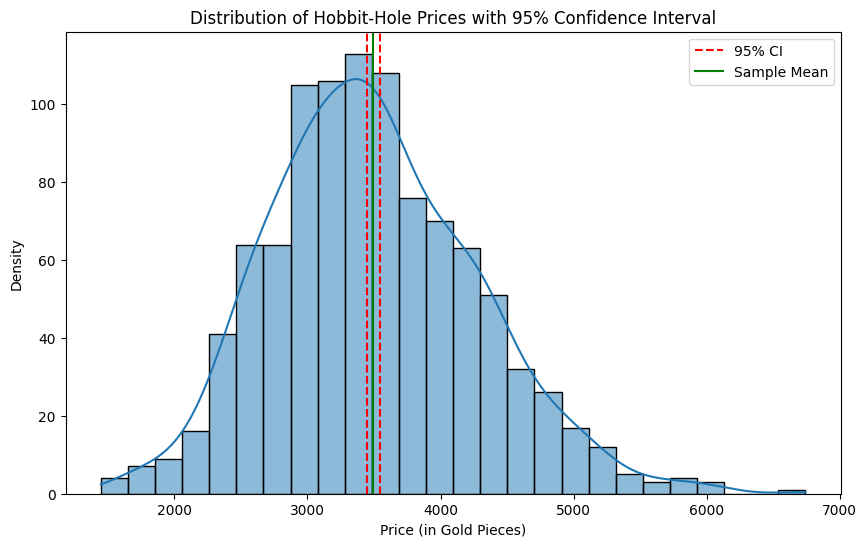

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confidence interval using statsmodels
confidence_level = 0.95
ci = sms.DescrStatsW(shire_df['Price']).tconfint_mean(alpha=1-confidence_level)
sample_mean = shire_df['Price'].mean()

# Create the plot with Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(shire_df['Price'], kde=True)

# Add the confidence interval lines and sample mean
plt.axvline(ci[0], color='r', linestyle='dashed', label='95% CI')
plt.axvline(ci[1], color='r', linestyle='dashed')
plt.axvline(sample_mean, color='g', label='Sample Mean')

# Customize the plot
plt.xlabel('Price (in Gold Pieces)')
plt.ylabel('Density')
plt.title('Distribution of Hobbit-Hole Prices with 95% Confidence Interval')
plt.legend()

# Show the plot
plt.show()


"This plot," Rosie explained, "shows us the distribution of hobbit-hole prices. The green line is our sample mean, and the red dashed lines show our confidence interval. This can help Grishnak and Mozgala visualize where most prices fall and how much uncertainty there is in our estimate."

As the hobbits marveled at their new understanding, Rosie summarized, "Confidence intervals are a powerful tool. They help us quantify uncertainty, which is crucial when making decisions based on sample data. For Grishnak and Mozgala, this means they can house-hunt with a clearer picture of the market, understanding both the typical prices and the range they might encounter."

## Linear Regression: Unraveling Relationships in the Shire

As our hobbit friends gather around a cozy fire in the Green Dragon Inn, Frodo pulls out a parchment filled with curious lines and dots. "Today," he says, "we're going to learn about a powerful tool called linear regression. It's like a magic spell that helps us understand and predict relationships between things."

### What is Linear Regression?

Linear regression is a statistical method used to model the relationship between variables. It's like drawing a line through a scatter of points that best represents their overall trend.

"Imagine," Frodo explains, "we're trying to understand how the size of a hobbit-hole relates to its price. We could plot each hobbit-hole as a point on a chart, with size on one axis and price on the other. Linear regression helps us draw the best line through these points."

### Key Components of Linear Regression

1.  **Dependent Variable (Y)**: This is what we're trying to predict or understand. In our case, it's the price of a hobbit-hole.
2.  **Independent Variable(s) (X)**: These are the factors we think might influence our dependent variable. For now, let's say it's the size of the hobbit-hole.
3.  **Regression Line**: This is the line that best fits our data points. It's described by an equation: Y = β₀ + β₁X + ε Where:
    -   Y is the dependent variable (price)
    -   X is the independent variable (size)
    -   β₀ is the y-intercept (the value of Y when X is zero)
    -   β₁ is the slope (how much Y changes for a one-unit increase in X)
    -   ε (epsilon) is the error term (the difference between predicted and actual Y values)

### The Goal of Linear Regression

"The goal," Sam chimes in, "is to find the values of β₀ and β₁ that make our line fit the data as closely as possible, right?"

"Exactly!" Frodo nods. "We're trying to minimize the overall distance between our line and all the actual data points."

### Method of Least Squares

Frodo continues, "We use a method called 'least squares' to find the best line. It's like trying to minimize the total area of all the little squares you could draw between each data point and the line."

This method finds the line that minimizes the sum of the squared differences between the observed Y values and the predicted Y values.

### Interpreting the Results

Once we have our regression line, we can interpret its components:

1.  **Slope (β₁)**: This tells us how much Y changes for a one-unit increase in X. "If β₁ is 5," Merry suggests, "it means for every 1 square foot increase in size, the price goes up by 5 gold pieces."
2.  **Intercept (β₀)**: This is the predicted value of Y when X is zero. "Though," Pippin laughs, "a hobbit-hole of size zero doesn't make much sense!"
3.  **R-squared**: This tells us how well our line fits the data. It ranges from 0 to 1, with 1 being a perfect fit. "If R-squared is 0.7," Frodo explains, "it means 70% of the variation in price can be explained by size."

### Assumptions of Linear Regression

Frodo reminds his friends of some important assumptions:

1.  **Linearity**: The relationship between X and Y should be linear.
2.  **Independence**: The observations should be independent of each other.
3.  **Homoscedasticity**: The spread of residuals should be consistent across all levels of X.
4.  **Normality**: The residuals should be normally distributed.

"We need to check these assumptions," Frodo warns, "to make sure our regression is valid."

### Multiple Linear Regression

"But what if we think price depends on more than just size?" Sam wonders.

"Great question!" Frodo replies. "We can use multiple linear regression to include more variables. Our equation would look like:

Y = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ + ε

Where each X represents a different independent variable, like size, garden area, distance to the nearest pub, and so on."

"So," Pippin summarizes, "we can use this to predict the price of a hobbit-hole based on its features?"

"Exactly!" Frodo beams. "But remember, it's not perfect. There's always some uncertainty in our predictions. That's why we often include confidence intervals (and p-values) with our estimates."

### Running Linear Regression in Python
WHile there are a number of ways to run linear regression in python, one straightforward way is this:

In [ ]:
import statsmodels.formula.api as smf

model = smf.ols(formula='Price ~ SquareFootage', data=shire_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     2475.
Date:                Wed, 10 Jul 2024   Prob (F-statistic):          1.81e-272
Time:                        18:57:09   Log-Likelihood:                -7453.9
No. Observations:                1000   AIC:                         1.491e+04
Df Residuals:                     998   BIC:                         1.492e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       816.6323     55.450     14.727

### Interpreting Our Hobbit-Hole Price Model

Now, let's think a bit about what all this means.

1. **The Big Picture: R-squared**
   
   R-squared: 0.713

   Remember how we talked about how well our data fits a line? This R-squared value tells us that about 71.3% of the variation in hobbit-hole prices can be explained by their square footage. That's quite a strong relationship!

2. **Our Magic Formula**

   We're trying to predict Price based on SquareFootage. Our formula looks like this:

   Price = 816.6323 + 3.3393 * SquareFootage

   - The Intercept (816.6323) is the predicted price of a hobbit-hole with zero square feet. It's not very meaningful in real life (who would live in a zero-sized hole?), but it helps our line fit better.
   - The SquareFootage coefficient (3.3393) tells us that for each additional square foot, the price increases by about 3.34 gold pieces on average.

3. **How Confident Are We? T-statistics and P-values**

   Remember when Gandalf taught us about hypothesis testing? Let's look at the t-statistics and p-values:

   - For SquareFootage: t = 49.745, p-value = 0.000

   This tiny p-value (much smaller than 0.05) tells us we can be very confident that there's a real relationship between size and price. It's not just random chance!

4. **Confidence Intervals**

   [0.025 0.975]
   SquareFootage: [3.208 3.471]

   Remember those confidence intervals Rosie taught us about? We can be 95% confident that the true increase in price for each square foot is between 3.208 and 3.471 gold pieces.

5. **Overall Model Fit: F-statistic**

   F-statistic: 2475., Prob (F-statistic): 1.81e-272

   This is like a p-value for our entire model. The incredibly small probability tells us our model as a whole is statistically significant.

### What Does This Mean for Hobbit-Hole Hunting?

1. Size matters! There's a strong relationship between a hobbit-hole's size and its price.
2. On average, each additional square foot adds about 3.34 gold pieces to the price.
3. We can explain about 71% of the price differences just by knowing the size, which is pretty good! But remember, there's still 29% we haven't explained - maybe that's due to things like location, age, or proximity to the best pubs!
4. Our model is statistically significant, which means we can be pretty confident in using it to understand and predict hobbit-hole prices.

Remember, while this model is useful, it doesn't tell the whole story. A hobbit-hole is more than just its size - there's the comfort, the view, the neighbors, and of course, the pantry capacity! Always use statistical models as a guide, but don't forget to use your hobbit sense too!

Now, who's ready to go estimate some hobbit-hole prices?



### Example: Multiple Regression in Python
We can try to improve our model by running a **multiple regression** that uses multiple predictors (not just house size).

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols(formula='Price ~ SquareFootage + Age + GardenSize + DistanceToPub + Neighborhood', data=shire_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     484.6
Date:                Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:57:04   Log-Likelihood:                -7281.4
No. Observations:                1000   AIC:                         1.458e+04
Df Residuals:                     991   BIC:                         1.463e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

### Expanding Our Hobbit-Hole Price Model: What's Changed?

Well, we've expanded our simple model include more factors. Let's see what's changed and what it means for our understanding of hobbit-hole prices.

1. **R-squared: More Explanation, But at What Cost?**
   
   Old R-squared: 0.713
   New R-squared: 0.796

   Our new model explains about 79.6% of the variation in prices, up from 71.3%. That's an improvement! But remember, adding more variables will always increase R-squared, even if those variables aren't truly important. It's like adding more ingredients to a soup - it might make it more complex, but not necessarily tastier!

2. **New Variables: What Else Affects Price?**

   We've added Neighborhood, Age, GardenSize, and DistanceToPub to our model. Let's look at their impacts:

   - Neighborhood: Different neighborhoods have different effects on price. For example, being in Bywater reduces the price by about 186.86 gold pieces compared to our reference neighborhood (probably Buckland).
   - SquareFootage: Still important! Each square foot adds about 3.30 gold pieces (very close to our original estimate).
   - GardenSize: Each square foot of garden adds about 2.14 gold pieces to the price.
   - Age and DistanceToPub: Surprisingly, these don't seem to have a significant effect (look at those large p-values!).

3. **Statistical Significance: Not All Variables Are Created Equal**

   Remember our discussion on p-values? Look at the 'P>|t|' column:
   - SquareFootage, GardenSize, and most Neighborhood variables have very small p-values (< 0.05).
   - But Age (p = 0.949) and DistanceToPub (p = 0.783) are not statistically significant.

4. **Model Complexity: More Isn't Always Better**

   Our model now has 8 variables (Df Model: 8) instead of just 1. This makes it more complex, which can be both good and bad:
   - Good: We're capturing more factors that might influence price.
   - Bad: More complex models can be harder to interpret and might "overfit" the data.

5. **Tradeoffs to Consider**

   a) **Parsimony** vs. **Completeness.** Simpler models are often preferred if they explain the data almost as well as complex ones. Our simple model with just SquareFootage was pretty good already!
   
   b) **Overfitting Risk**. Complex models might fit our current data very well but perform poorly on new data. It's like memorizing answers instead of understanding the concept.
   
   c) **Multicollinearity.** The "Cond. No." (Condition Number) is quite large, suggesting some variables might be highly correlated. This can make our estimates less reliable.

### What Does This Mean for Our Hobbit-Hole Analysis?

1. SquareFootage and GardenSize are clearly important in determining price.
2. The neighborhood matters too, with some areas being pricier than others.
3. Surprisingly, the age of the hobbit-hole and its distance to the nearest pub don't seem to affect the price much (or at least, not in a simple linear way).
4. While our new model explains more of the price variation, it's also more complex. We need to balance the additional insight against the risk of overfitting.

Remember, in statistics as in life, more isn't always better! Sometimes, a simple explanation (like our SquareFootage-only model) can be almost as good as a complex one, and much easier to understand and use.

Now, who's ready to debate whether we should keep Age and DistanceToPub in our model?



## Correlation: The Hidden Connections of Middle-earth

As the hobbits sat in the Green Dragon Inn, poring over their multiple regression results, a soft glow filled the room. They looked up to see the Lady Galadriel, her eyes twinkling with ancient wisdom.

"Greetings, young scholars of the Shire," she said, her voice melodious. "I see you've delved into the realms of regression. But there's another power you must understand: correlation."

The hobbits leaned in, eager to learn from the Lady of Lórien.

### What is Correlation?

Galadriel began, "Correlation is the measure of how two things change together. It reveals the hidden threads that connect different aspects of our world."

She waved her hand, and shimmering images appeared in the air:

1. "See how the height of Mallorn trees correlates with the radiance of their leaves? As one increases, so does the other – a positive correlation."

2. "Now observe the relationship between a Dwarf's beard length and the time he spends mining. As one grows, the other diminishes – a negative correlation."

3. "Look at the correlation between an Elf's age and their wisdom. It's strong, but not perfect – other factors play a role."

4. "Now, witness the correlation between the number of Hobbits at a party and the amount of food consumed. Quite strong indeed!" The hobbits chuckled at this.

5. "Lastly, see the correlation between the phase of the moon and the growth of pipe-weed. Ah, there is none – not all things are correlated."

### Key Points About Correlation

Galadriel's voice took on a more serious tone as she explained:

1. **Strength and Direction**:
   "Correlation is measured from -1 to +1. A value of +1 indicates a perfect positive correlation – as one variable increases, the other increases proportionally. A value of -1 shows a perfect negative correlation – as one increases, the other decreases proportionally. Zero represents no correlation."

2. **Interpretation**:
   "The strength of correlation can be interpreted thus:
   - 0.00 to 0.19: A whisper of a connection, like the faintest starlight
   - 0.20 to 0.39: A gentle link, akin to a brook's quiet babble
   - 0.40 to 0.59: A moderate bond, like the steady glow of Elven lamps
   - 0.60 to 0.79: A strong tie, reminiscent of the roots of great trees
   - 0.80 to 1.00: A profound connection, as unbreakable as mithril"

3. **Causation vs Correlation**:
   "Beware, for correlation does not imply causation. The roosters of Farmer Maggot may crow at dawn, and the sun may rise, but one does not cause the other. They are merely correlated events."

4. **Linearity**:
   "Correlation measures linear relationships. Like a straight path through the woods, it may miss the winding trails. Non-linear relationships, like the cycles of seasons or the growth of a hobbit child, may not be captured by simple correlation."

5. **Outliers and Influence**:
   "Just as a single drop of Galadriel's water can greatly affect a garden, extreme values – outliers – can strongly influence correlation. Always look closely at your data, for sometimes the unusual holds great power."

6. **Restriction of Range**:
   "If you only measure the heights of Ents, you might think height has little correlation with strength. But include hobbits and humans in your measure, and the correlation becomes clear. The range of your data can hide or reveal correlations."

### The Wisdom in Correlation

Galadriel's eyes sparkled as she continued, "Correlation can reveal much, but like all powers, it must be used wisely. It can show us connections we never imagined, but it can also mislead if we're not careful."

She gestured to the hobbits' housing data. "In your studies of hobbit-holes, correlation can show you which features tend to change together. The size of a hole and its price, the age of a dwelling and its garden size – all these may be correlated. But remember, correlation is just the beginning of understanding. It points the way, but does not tell the whole tale."

### A Word of Caution

"And yet," Galadriel warned, her voice taking on a grave tone, "beware the temptation to see correlation where none exists. The human mind, and indeed the hobbit mind, seeks patterns even in randomness. Not every correlation is meaningful, and not every meaningful relationship is a simple correlation."

As Galadriel's lesson came to an end, the hobbits found themselves looking at their data with new eyes. They realized that in correlation, they had a tool as subtle and powerful as Elven magic – one that could reveal the hidden structures of their world, if used with wisdom and care.

"Now," Galadriel smiled, "shall we look at your data and see what correlations it may hold?"

The hobbits nodded eagerly, ready to apply their new knowledge to their beloved Shire.



### Correlation Analysis in Python
Here's how we can run our correlation analysis in Python.

In [ ]:
# Select numeric columns
numeric_cols = ['SquareFootage', 'Age', 'GardenSize', 'DistanceToPub', 'Price']

# Calculate the correlation matrix
corr_matrix = shire_df[numeric_cols].corr()

corr_matrix.round(2)

,SquareFootage,Age,GardenSize,DistanceToPub,Price
SquareFootage,1.00,-0.08,0.03,0.09,0.84
Age,-0.08,1.00,0.01,-0.15,-0.06
GardenSize,0.03,0.01,1.00,-0.00,0.30
DistanceToPub,0.09,-0.15,-0.00,1.00,0.08
Price,0.84,-0.06,0.30,0.08,1.00



### Key Observations

1.  **SquareFootage and Price** (0.84) "The strongest thread in this tapestry," Galadriel noted, "is between SquareFootage and Price. At 0.84, this is a very strong positive correlation. As hobbit-holes grow larger, their prices tend to increase substantially. This is not surprising, for space is valuable in the Shire."
2.  **GardenSize and Price** (0.30) "There's a moderate positive correlation between GardenSize and Price," she continued. "Hobbits do value their gardens, but perhaps not as much as the interior space of their homes. A larger garden tends to increase the price, but not as dramatically as the size of the hobbit-hole itself."
3.  **Age and Price** (-0.06) "Interestingly," Galadriel mused, "there's a very weak negative correlation between Age and Price. This suggests that older hobbit-holes tend to be slightly less expensive, but the effect is minimal. The charm of an old hobbit-hole might balance out any wear and tear."
4.  **DistanceToPub and Price** (0.08) With a slight smile, Galadriel noted, "The distance to the nearest pub has a very weak positive correlation with Price. It seems that being far from a pub doesn't significantly lower a hobbit-hole's value. Perhaps the joy of a longer walk builds thirst and anticipation!"
5.  **SquareFootage and GardenSize** (0.03) "There's almost no correlation between SquareFootage and GardenSize," Galadriel observed. "This tells us that larger hobbit-holes don't necessarily have larger gardens, and vice versa. Each hobbit seems to make their own choice about balancing indoor and outdoor space."
6.  **Age and DistanceToPub** (-0.15) "There's a weak negative correlation between Age and DistanceToPub," she pointed out. "This might suggest that newer hobbit-holes tend to be built slightly further from pubs, perhaps as the Shire expands outward over time."

### Significance and Implications

Galadriel's voice took on a tone of wisdom as she explained the significance:

1.  **Predicting Prices**: "The strong correlation between SquareFootage and Price suggests that size is the most important factor in determining a hobbit-hole's value. This could be very useful for estimating prices or deciding how to invest in property improvements."
2.  **Independence of Features**: "Many of the features show weak correlations with each other. This is actually beneficial for statistical analysis, as it means these features provide independent information about the hobbit-holes."
3.  **Surprising Non-Correlations**: "The weak correlation between Age and Price might surprise some. It suggests that older hobbit-holes retain their value well in the Shire."
4.  **Market Insights**: "The moderate correlation between GardenSize and Price, compared to the strong correlation with SquareFootage, might indicate that hobbits value indoor space more than outdoor space when it comes to price. This could inform decisions about home improvements or new constructions."
5.  **Cultural Reflections**: "The very weak correlation between DistanceToPub and Price might reflect the Shire's laid-back culture. Proximity to a pub doesn't seem to be a major factor in housing decisions."

## Inferential Statistics in the Real World: Beyond the Borders of the Shire

As we bid farewell to the cozy hobbit-holes and lush landscapes of the Shire, let's embark on a new adventure into the realm of real-world applications of inferential statistics. The statistical tools we've learned - from hypothesis testing to linear regression and correlation analysis - are not just for understanding hobbit-hole prices or the potency of Elvish wine. They are powerful instruments used daily across various fields to make crucial decisions and drive progress.

### 1. Scientific Research

In the world of science, inferential statistics are as essential as a wizard's staff:

- Medical Researchers use t-tests and chi-square tests to determine if new drugs are effective. For example, they might compare the recovery rates of a treatment group against a control group to see if a new cancer therapy is significantly better than existing treatments.

- Climate scientists use multiple regression to model the relationship between various factors (CO2 levels, solar radiation, oceanic temperatures) and global climate patterns. This helps in predicting future climate trends and understanding the impact of human activities.

- Psychologists often use correlation analysis to explore relationships between different aspects of human behavior or mental processes. For instance, they might investigate the correlation between stress levels and sleep quality.

### 2. Business and Economics

In the corporate world, statistics are as valuable as gold in Erebor:

- Companies like Amazon and Netflix use hypothesis testing (**A/B Testing**) to compare the effectiveness of different website designs or promotional strategies. They might test if a new website layout significantly increases user engagement or purchase rates.

- Financial analysts use multiple regression to model stock prices based on various economic indicators, company performance metrics, and market trends. This helps in making investment decisions and predicting market movements.

- Businesses analyze correlations between factors like advertising spend, seasonal trends, and economic indicators to forecast future sales and optimize their strategies.

### 3. Sports Analytics

In the arena of sports, statistics play a role as crucial as Sam did in Frodo's quest:

- Teams use regression models to predict player performance based on past statistics, physical attributes, and other factors. This informs decisions about player trades, contracts, and game strategies.

-  Coaches might use paired t-tests to compare athletes' performance before and after implementing a new training regimen, determining if the new method significantly improves results.

- Sports scientists analyze correlations between training loads, recovery times, and injury rates to develop optimal training schedules that maximize performance while minimizing injury risk.

### 4. Public Policy and Social Sciences

In governing realms beyond Gondor, statistics guide critical decisions:

- Policymakers use multiple regression to understand factors influencing student performance, such as class size, funding, and teaching methods. This informs decisions about resource allocation and educational reforms.

-  Governments use statistical tests to evaluate the effectiveness of social programs. For example, they might compare employment rates before and after implementing a job training program to assess its impact.

- Researchers examine correlations between various socio-economic factors and crime rates to develop crime prevention strategies and inform law enforcement policies.

### 5. Environmental Science

In protecting our world (much like the Ents protected Fangorn), statistics play a vital role:

- Ecologists use time series analysis and regression to track animal populations over time, identifying significant trends and factors affecting biodiversity.

- Environmental scientists might use ANOVA to compare pollution levels across different regions or time periods, determining if cleanup efforts have had a significant impact.

### The Universal Language of Data

Just as the Common Tongue united the peoples of Middle-earth, statistics serves as a universal language in our modern world. It allows us to:

1. Make informed decisions based on evidence rather than intuition or anecdote.
2. Quantify uncertainty and risk in complex situations.
3. Uncover hidden patterns and relationships in large datasets.
4. Test theories and hypotheses across all fields of study.
5. Communicate complex findings in a clear, standardized way.

### Conclusion: The Power and Responsibility of Statistics

As we've seen, the statistical tools we learned through our adventures in the Shire have far-reaching applications in our world. From advancing medical treatments to optimizing business strategies, from enhancing athletic performance to shaping public policy, inferential statistics plays a crucial role in countless aspects of modern life.

However, with this power comes great responsibility. Just as the One Ring could be used for good or ill, statistics can be misused or misinterpreted. As you go forth and apply these tools in your own fields of study or work, remember the wisdom gained from our journey:

- Always consider the context and limitations of your data.
- Be wary of confusing correlation with causation.
- Consider practical significance alongside statistical significance.
- Remain critical and curious, always questioning and verifying results.

By wielding the power of statistics wisely, you have the ability to illuminate truth, drive progress, and make a positive impact on the world – a quest every bit as noble as saving Middle-earth!



## Review With Quizlet

In [1]:
%%html
<iframe src="https://quizlet.com/960146641/learn/embed?i=psvlh&x=1jj1" height="600" width="100%" style="border:0"></iframe>

## Glossary
| Term | Definition |
|------|------------|
| Alternative hypothesis | A statement that contradicts the null hypothesis, suggesting a relationship or difference exists between variables. It's what researchers aim to support with evidence. |
| Beta coefficient (regression) | A measure in regression analysis that represents the change in the dependent variable for one unit change in the independent variable, holding other variables constant. |
| Chi-square statistic | A value that measures the difference between observed frequencies and expected frequencies in categorical data, used in chi-square tests to assess independence or goodness of fit. |
| Chi-square test | A statistical method used to determine if there is a significant relationship between categorical variables or if observed frequencies differ from expected frequencies. |
| Confidence interval | A range of values that likely contains the true population parameter, based on sample data and a specified level of confidence. |
| Confidence level | The probability that the true population parameter falls within the calculated confidence interval, often expressed as a percentage (e.g., 95% or 99%). |
| Contingency table | A type of table that displays the frequency distribution of variables in a matrix format, often used in analyzing the relationship between categorical variables. |
| Correlation coefficient | A numerical measure that quantifies the strength and direction of the linear relationship between two variables, ranging from -1 to +1. |
| Degrees of freedom | The number of independent values that can vary in a statistical calculation without violating any constraints, often used in hypothesis testing and model evaluation. |
| Dependent variable | The outcome or response variable in a statistical analysis, whose value is predicted or explained by other variables in the model. |
| F-statistic | A value used in ANOVA and regression analysis to test the overall significance of a model by comparing the explained variance to the unexplained variance. |
| Hypothesis test | A statistical method used to make inferences about population parameters based on sample data, involving the comparison of a null hypothesis against an alternative hypothesis. |
| Independent variable | A variable in a statistical model that is manipulated or observed to predict or explain changes in the dependent variable. |
| Inferential statistics | The branch of statistics focused on making generalizations about a population based on sample data, including hypothesis testing and parameter estimation. |
| Intercept (regression) | The predicted value of the dependent variable when all independent variables are zero, represented as the point where the regression line crosses the y-axis. |
| Linear regression | A statistical method used to model the linear relationship between a dependent variable and one or more independent variables, often used for prediction and understanding variable relationships. |
| Linearity | An assumption in many statistical analyses that the relationship between variables can be represented by a straight line, critical for the proper application of linear models. |
| Margin of error | The range of values above and below the sample statistic in a confidence interval, indicating the level of uncertainty in a survey or poll result. |
| Multiple regression | An extension of simple linear regression that analyzes the relationship between a dependent variable and two or more independent variables simultaneously. |
| Null hypothesis | The initial assumption in hypothesis testing that there is no significant effect, difference, or relationship between variables, which researchers aim to disprove. |
| Overfitting | A modeling error where a statistical model captures noise in the data rather than the underlying relationship, leading to poor generalization to new data. |
| Parameter | A numerical characteristic of a population, such as the population mean or standard deviation, often estimated using sample statistics. |
| Parsimony | The principle in statistical modeling that simpler explanations or models are preferable to more complex ones, all else being equal. |
| P-hacking | The practice of manipulating data analysis to find statistically significant results, often by selectively reporting or altering analyses until desired outcomes are achieved. |
| Power (statistical) | The probability of correctly rejecting a false null hypothesis, or the ability of a test to detect an effect when one truly exists. |
| P-value | The probability of obtaining test results at least as extreme as the observed results, assuming that the null hypothesis is true. |
| R-squared | A statistical measure that represents the proportion of variance in the dependent variable that is predictable from the independent variable(s) in a regression model. |
| Statistic | A numerical value calculated from sample data that provides information about a characteristic of the sample or estimates a population parameter. |
| T-statistic | A value used in hypothesis testing, particularly in t-tests, that measures how many standard deviations a sample statistic is from the null hypothesis. |
| T-test | A statistical test used to determine if there is a significant difference between the means of two groups, which follows a t-distribution under the null hypothesis. |
| Type 1 error | The incorrect rejection of a true null hypothesis, also known as a "false positive" in hypothesis testing. |
| Type 2 error | The failure to reject a false null hypothesis, also known as a "false negative" in hypothesis testing. |
| Z-score | A standardized measure that indicates how many standard deviations an observation or data point is from the mean of a distribution. |
| Z-test | A statistical test used to determine whether two population means are different when the variances are known and the sample size is large, based on the standard normal distribution. |

